</span>
</center></b>
</span><br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
Homework 3: MongoDB and Neo4j Tests
</span>
</center></i><br><br>

# Introduction

## Registration

- This notebook performs testing of your environment, more specifically the new databases, for HW 3. The setup is common for both tracks.


- The setup tests assumes you have registered for free databases for Neo4j and MongoDB.
    - Neo4j registration: https://neo4j.com/cloud/aura/
    - MongoDB: https://www.mongodb.com/atlas/database
    
    
- You will create user IDs on both databases. Neo4j generates a password for you. You can choose a password for MongoDB.
    - __Write this information down.__
    - <span style="color: red;"><b>Unlike your local MySQL database, these databases are "on the cloud."</span>
        - Do not put and sensitive information in these database.
        - Keep the user ID and password information private.
    

## Connecting

- Connecting to the databases can be a little tricky.

### Neo4j Auradb

1. Create a database, and choose the free options.
<br><br>
2. You can choose any name for the database you want. Just make sure you remember it.
<br><br>
3. Select the option to add the starting dataset.
<br><br>
4. The GCP region does not matter, but I chose Iowa.
<br><br>
5. When you choose create database, you get the login user ID and password. __Save this information.__
<br><br>
6. Once the creation is complete, choose the option to query. You will see a login form:
    - From the server URL, copy the network address/URL. It will be something like "neo4j+s://xxxxxxxx.databases.neo4j.io:7687"
    - You can use the default user and password.
<br><br>
7. There are some Python tests later in this notebook. You will need:
    - The connection URL.
    - User ID
    - Password.
<br><br>
8. When you select query, you will get a new console and can start some Neo4j queries.

### MongoDB

1. Choose to create a database.
<br><br>
2. Selected the "shared" option to get a free database.
<br><br>
3. The cloud provider and region do not matter. I user Amazon and N. Virginia.
<br><br>
4. You will be asked to choose a user name and password. Pick something safe and sensible and save them somewhere.
<br><br>
5. At the bottom, you will see something like ..., which is important
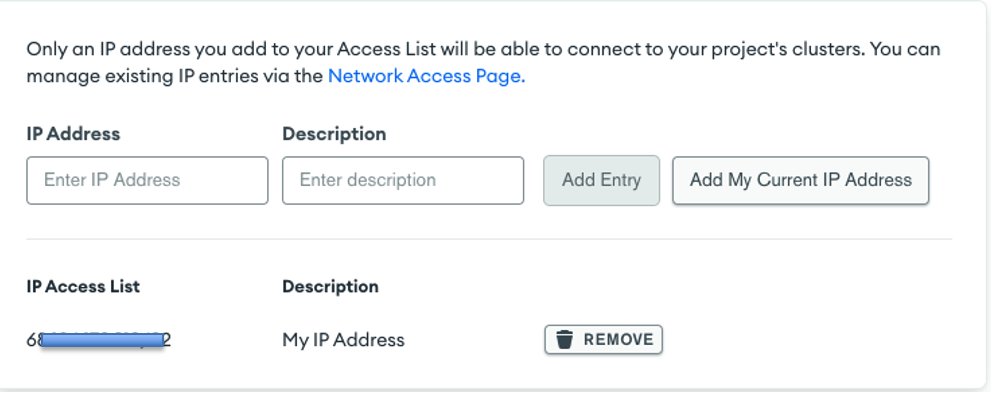
6. Your IP address will change from time to time. If you have trouble connecting at a later time, log into Atlas and go to network access. Update your IP address.
<br><br>
7. Click on your cluster (the default name is Cluster 0). Create a database.
<br><br>
8. Go back to the cluster main page and click on the connect button. Choose connect with your application and choose Python. Choose "Include full driver code" and copy the information. This gives you your user URL.

# Test

- There is a file in the project director ... ```dff9_config.py.``` 
    - Rename the file ```config.py```.
    - Replace the values with the user IDs, password and URLs from above.
    

- The following tests should work.

In [1]:
import got_test_neo

In [4]:
def t_neo():
    g = got_test_neo.get_graph()
    q = "match (p:Person) where p.name=$name return p"
    res = g.run_q(q, {"name": "Tom Hanks"})
    print(type(res))
    for r in res:
        print(type(r))
        print(r)
        print("Labels = ", r['p'].labels)
        print("Properties = ", dict(r['p']))

In [5]:
t_neo()

<class 'py2neo.cypher.Cursor'>
<class 'py2neo.cypher.Record'>
Node('Person', born=1956, name='Tom Hanks')
Labels =  :Person
Properties =  {'born': 1956, 'name': 'Tom Hanks'}


In [10]:
import got_mongo

In [7]:
client = got_mongo.get_client()

In [8]:
def t_mongo():
    c = client
    print(list(c.list_databases()))

In [9]:
t_mongo()

[{'name': 'admin', 'sizeOnDisk': 380928, 'empty': False}, {'name': 'local', 'sizeOnDisk': 7732920320, 'empty': False}]


- Your actual answers might be different, but if you did not get errors or exceptions and got some answer, you are OK.